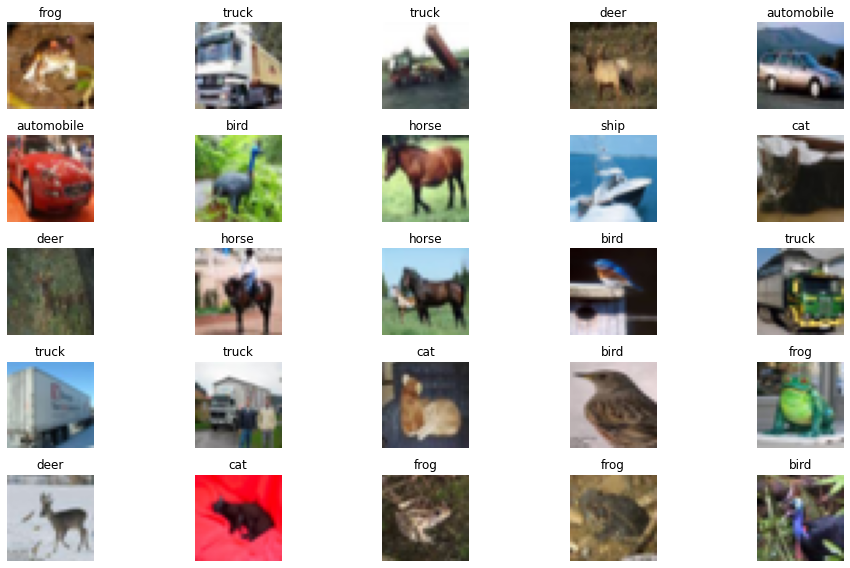




Epoch 1/20


1563/1563 [==============================] - 73s 46ms/step - loss: 1.8778 - accuracy: 0.3104 - val_loss: 1.5356 - val_accuracy: 0.4270
Epoch 2/20
1563/1563 [==============================] - 67s 43ms/step - loss: 1.6171 - accuracy: 0.4090 - val_loss: 1.6412 - val_accuracy: 0.4433
Epoch 3/20
1563/1563 [==============================] - 75s 48ms/step - loss: 1.4900 - accuracy: 0.4615 - val_loss: 1.2753 - val_accuracy: 0.5407
Epoch 4/20
1563/1563 [==============================] - 76s 49ms/step - loss: 1.4029 - accuracy: 0.4982 - val_loss: 1.2717 - val_accuracy: 0.5538
Epoch 5/20
1563/1563 [==============================] - 71s 45ms/step - loss: 1.3356 - accuracy: 0.5242 - val_loss: 1.2566 - val_accuracy: 0.5682
Epoch 6/20
1563/1563 [==============================] - 72s 46ms/step - loss: 1.2943 - accuracy: 0.5446 - val_loss: 1.0648 - val_accuracy: 0.6225
Epoch 7/20
1563/1563 [==============================] - 61s 39ms/step - loss: 1.2644 - accuracy: 0.5546 - val_loss: 1.0

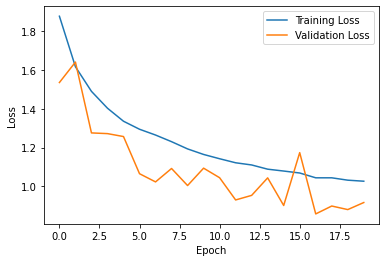

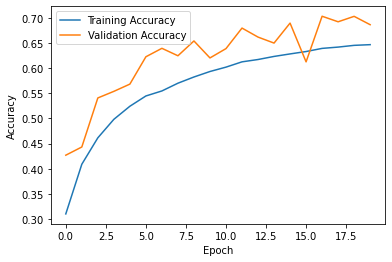

313/313 [==============================] - 4s 11ms/step
              precision    recall  f1-score   support

    airplane       0.78      0.70      0.74      1000
  automobile       0.87      0.83      0.85      1000
        bird       0.65      0.47      0.54      1000
         cat       0.54      0.44      0.49      1000
        deer       0.62      0.61      0.62      1000
         dog       0.66      0.57      0.62      1000
        frog       0.48      0.95      0.63      1000
       horse       0.76      0.72      0.74      1000
        ship       0.89      0.77      0.82      1000
       truck       0.83      0.80      0.81      1000

    accuracy                           0.69     10000
   macro avg       0.71      0.69      0.69     10000
weighted avg       0.71      0.69      0.69     10000



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Convert class vectors to binary class matrices
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Convert one-hot encoded labels to integers
y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)

# Vizualize the data
num_classes = 10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig, axes = plt.subplots(5, 5, figsize=(14, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i])
    ax.set_title(class_names[y_train_int[i]])  # Use y_train_int instead of y_train
    ax.axis('off')
plt.tight_layout()
plt.show()

# Normalize the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

datagen.fit(X_train)

# Define the CNN model
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with data augmentation
history = cnn.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=20, validation_data=(X_test, y_test))

# Evaluate the model on the test dataset
test_loss, test_accuracy = cnn.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Get the predicted labels
y_pred_probs = cnn.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate the classification report
report = classification_report(y_test_int, y_pred, target_names=class_names)

# Print the report
print(report)


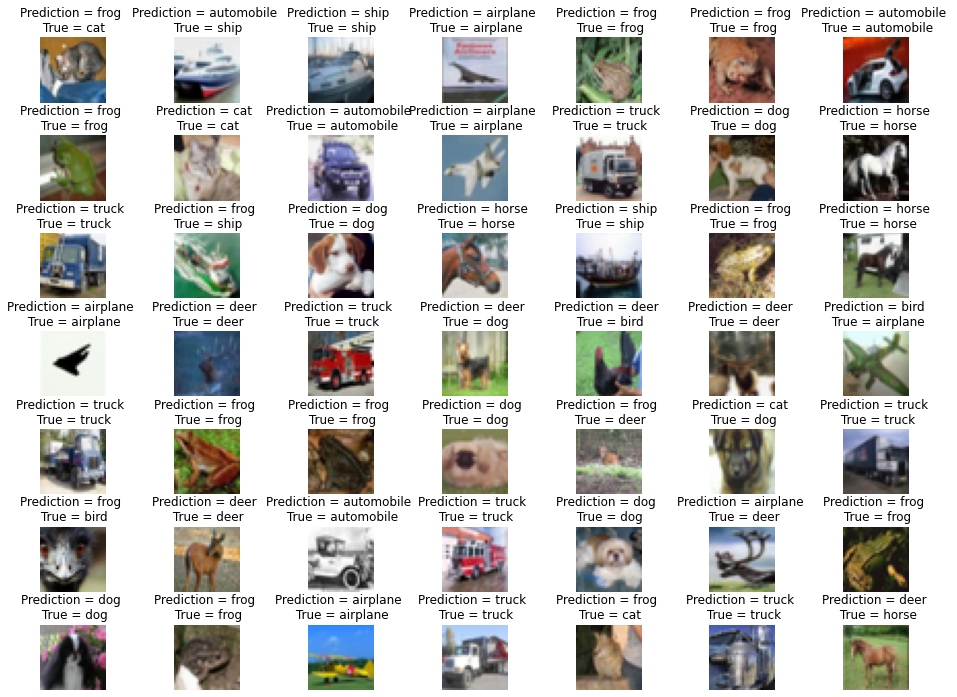

In [2]:
import matplotlib.pyplot as plt
import numpy as np
# Visualize predictions
l = 7
w = 7
fig, axes = plt.subplots(l, w, figsize=(16, 12))
axes = axes.ravel()

for i in np.arange(0, l * w):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {} \n True = {}'.format(class_names[y_pred[i]], class_names[y_test_int[i]]))
    axes[i].axis('off')
    
fig.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()


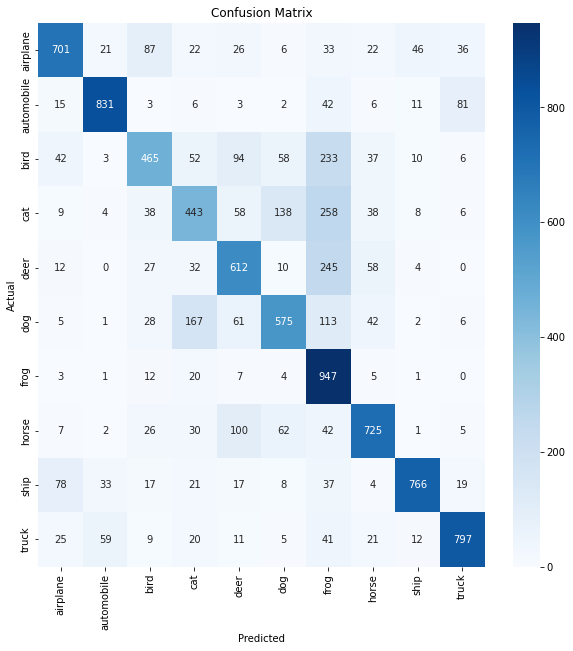

In [7]:
# Plot confusion matrix
cm = confusion_matrix(y_test_int, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [8]:
# Save the model
cnn.save('cnn_model.h5')


C:\Users\kolli\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
# Load the model
loaded_model = tf.keras.models.load_model('cnn_model.h5')
